## Practice: Linear regression from scratch

In [85]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Generate data

In [86]:
np.random.seed(0) # fix the seed for reproducibility

mean = [-1, 1] # mean of normal  distribution. Try others
cov = [[1, -0.75],
       [-0.75, 1]] # covariance of normal distribution

sample = np.random.multivariate_normal(mean, cov, size = 1000) # 1000 normally distributed samples
# TODO: compare with normalized normal distribution; also with other distributions; also add outliers

In [87]:
# add abnormal data

sample = np.append(sample, [[-4,-2]], axis = 0)
sample

array([[-2.50864293,  2.79159681],
       [-1.12325016,  2.70780094],
       [-3.09246045,  2.40142063],
       ...,
       [-2.25499029,  2.36701993],
       [-0.39534705, -0.53164899],
       [-4.        , -2.        ]])

If you wanna to play with multivariate_normal

In [88]:
# mean = [0, 0]
# cov = [[1, -0.75],
#        [-0.75, 1]]
# x, y = np.random.multivariate_normal(mean, cov, 100000).T

# x = np.append(x, -10)
# y = np.append(y, 10)
# print(x)
# plt.plot(x, y, 'x')
# plt.axis('equal')
# plt.show()
# max(abs(x)), max(abs(y))

Create and visualize dataset

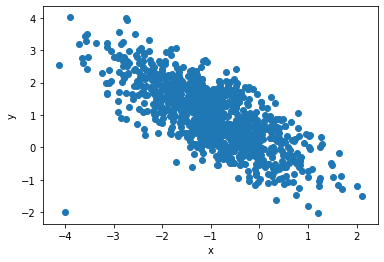

In [89]:
x, y = sample[:, 0], sample[:, 1]  # separate samples on feature x and target y

# Visualize dataset
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [90]:
# Add singular bias feature
X = np.array([np.array([1,val]) for val in x])
X[:5], y[:5]

(array([[ 1.        , -2.50864293],
        [ 1.        , -1.12325016],
        [ 1.        , -3.09246045],
        [ 1.        , -1.94223919],
        [ 1.        , -0.75827911]]),
 array([2.79159681, 2.70780094, 2.40142063, 1.83521348, 1.0486161 ]))

In [91]:
X.shape, y.shape

((1001, 2), (1001,))

### Define model

Prediction function $y = \theta^Tx$:

In [92]:
def predict(X, theta):
    return np.dot(X,theta)

Cost function as normalized sum of errors on the dataset: $J(\theta) = \frac{1}{2n} \sum\limits_{i=1}^n(y-h_\theta(X))^2$

In [93]:
def computeCost(X, y, theta):
    return sum((y-predict(X, theta))**2) / (2*len(X))

Test for random weights:

In [94]:
X[0]

array([ 1.        , -2.50864293])

In [95]:
theta = np.empty_like(X[0])
theta

array([1.        , 2.50864293])

Check shape

In [96]:
predict(X, theta).shape

(1001,)

In [97]:
computeCost(X, y, theta)

8.273495650168998

Visualize model's prediction:

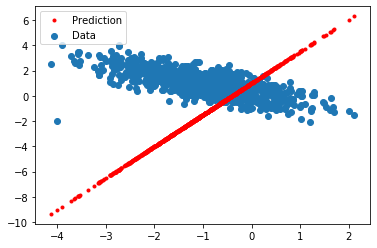

In [98]:
plt.scatter(x, y, label = 'Data')
plt.plot(x,predict(X, theta), 'r.', label = "Prediction")
plt.legend()

Obviously two points are enough to show linear model:

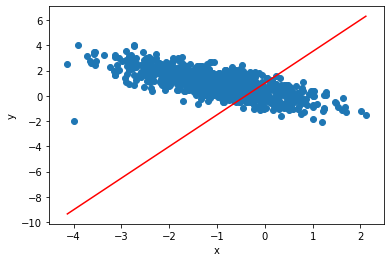

In [126]:
extremes = np.array([np.min(x), np.max(x)]) # edge points
line = theta[0] + extremes * theta[1] # prediction formula without adding singular column

plt.plot(extremes, line, 'r-')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Let's visualize cost function surface in 3d space. For this compute cost function value for a grid-shaped set of theta:

In [100]:
size = 100 # amount of tries for each parameter
limits = (-10,10) # range of values for each parameter
error = np.zeros((size,size)) # empty matrix of errors
for i,w in enumerate(np.linspace(*limits,size)): # for each theta[0] component
    for j,b in enumerate(np.linspace(*limits,size)): # for each theate[1] component
        error[i,j] = computeCost(X, y, np.array([w,b])) # compute cost for each theta

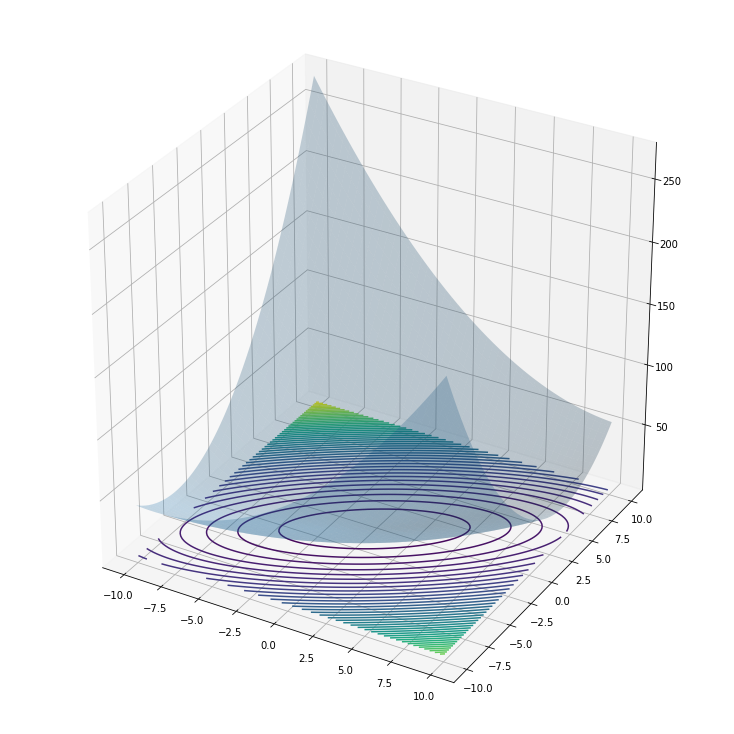

In [101]:
# initialize figure
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)

# create 2d array for each index 
L,K = np.meshgrid(np.linspace(*limits,size),np.linspace(*limits,size))

ax.plot_surface(K,L,Z = error, alpha = 0.25) # plot cost function surface in 3d
plt.contour(K,L,error,50, offset = 0) # plot cost function 2d-projection

## Learn model

Define learning algorithm

Simple gradient descent algorithm: 

$\theta = \theta + \alpha \nabla J(\theta)$

$\nabla J(\theta) = \sum_m(y - h_\theta(X))X$

In [115]:
def gradientDescent(X, y, init = 1, alpha = 0.001, iters = 100):
    #     theta = np.array([1,1]) * init # init theta with any scalar or vector
    theta = np.ones_like(X[0]) * init # init theta with any scalar or vector
    m = len(X)
    history = [] # list of theta values on each iteration 
    cost = [] # list of cost function values on each iteration
    
    for i in range(iters):
        history.append(theta)
        cost.append(computeCost(X, y, theta))
        
        theta = theta + alpha * (np.sum((y - np.dot(X, theta.T)) * X.T, axis = 1))
        
    return theta, np.array(cost), np.array(history)

Initialize learning

In [180]:
alpha = 0.0001
iters = 100

Learn model

In [181]:
w, cost, history = gradientDescent(X, y,
                                 alpha = alpha,
                                 iters = iters,
                                 init = [5, 10])# initialize with far point for better visualization

In [182]:
print('Model`s cost:', computeCost(X, y, w))
print('Calculated weights: ', w)

Model`s cost: 0.22968743245585363
Calculated weights:  [ 0.43387609 -0.61364832]


Check (0,0) solution:

In [167]:
ww = [0,0]
print("Model's cost: ", computeCost(X, y, ww))

Model's cost:  0.9487078308226138


Visualize model

[-4.12975815  2.11266229]


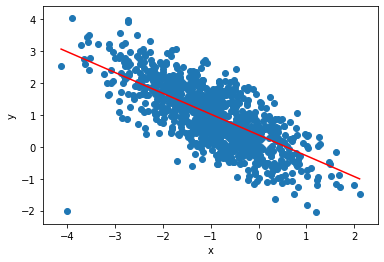

In [131]:
extremes = np.array([np.min(x), np.max(x)])
line = w[0] + extremes * w[1]
print(extremes)
plt.plot(extremes, line, 'r-')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Visualize learning process

Cost function:

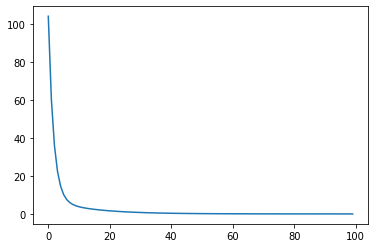

In [132]:
plt.plot(cost)

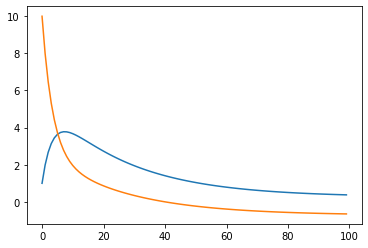

In [133]:
plt.plot(history)

Model's trajectory in parameter's space

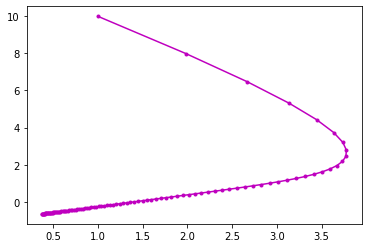

In [134]:
# plt.coutour(K, L, error, 50)
plt.plot(history[:,0], history[:,1], 'm.-')

Model's trajectory on cost function surface:

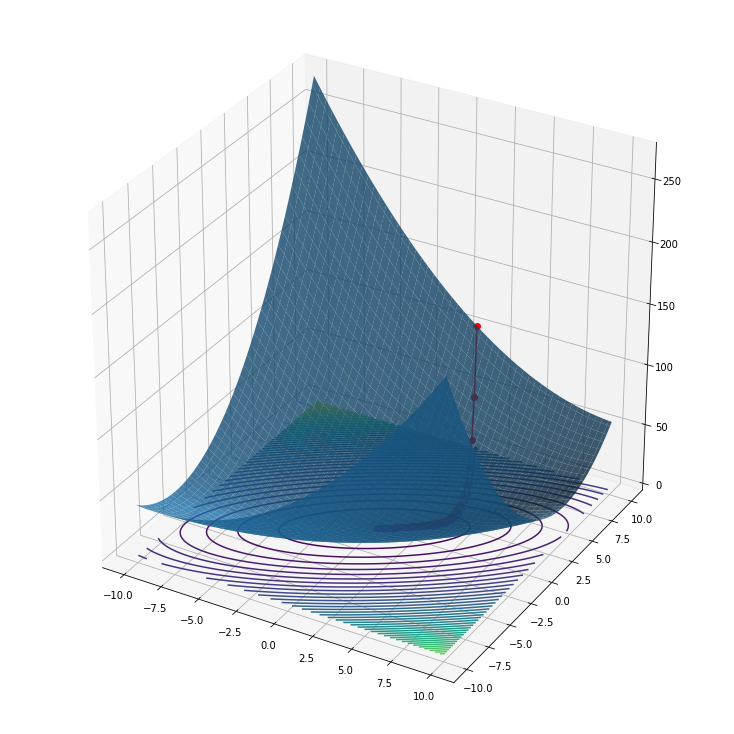

In [135]:
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)
ax.plot_surface(K,L,Z = error, alpha = 0.8)
ax.plot3D(history[:,0], history[:,1], cost, 'ro-')
plt.contour(K,L,error,50, offset = 0)
plt.plot(history[:,0], history[:,1],'m.-')

# We can determine the number of learning iterations and value of alpha to achieve a given cost value
## For example 0.1. It is less than we have after 100 iterations and alpha 0.0001

In [255]:

iters = 10
alpha = 0.0001
cost_history_hp = [0]
while True:
    w, cost, history = gradientDescent(X, y,
                                 alpha = alpha,
                                 iters = iters,
                                 init = [5, 10])# initialize with far point for better visualization
    
    print(iters, alpha, computeCost(X, y, w))
    iters = iters+10
    if (cost_history_hp[-1] - computeCost(X, y, w))**2<=0.00001:
        break
    
    cost_history_hp.append(computeCost(X, y, w))
    
    
print('Model`s cost:', computeCost(X, y, w))
print('Calculated weights: ', w)

10 0.0001 8.64167387662515
20 0.0001 4.049573100045125
30 0.0001 1.992220698647535
40 0.0001 1.0406968254570885
50 0.0001 0.6005359418951195
60 0.0001 0.39692380339874284
70 0.0001 0.30273573547540056
80 0.0001 0.25916568014884156
90 0.0001 0.23901079468389272
100 0.0001 0.22968743245585363
110 0.0001 0.2253745782158038
120 0.0001 0.2233795134268401
Model`s cost: 0.2233795134268401
Calculated weights:  [ 0.34018947 -0.67276166]


In [267]:
iters = 120
alpha = 1
cost_history_hp = [0]
while True:
    w, cost, history = gradientDescent(X, y,
                                 alpha = alpha,
                                 iters = iters,
                                 init = [5, 10])# initialize with far point for better visualization

    print(iters, alpha, computeCost(X, y, w))
    if computeCost(X, y, w)<=0.3:
        break
    alpha = round(alpha*0.3, 5)

    
#     cost_history_hp.append(computeCost(X, y, w))
    
print('{:.6f}'.format(alpha))
print('Model`s cost:', computeCost(X, y, w))
print('Calculated weights: ', w)

120 1 nan
120 0.3 nan
120 0.09 inf
120 0.027 inf
120 0.0081 inf
120 0.00243 1.8346774249005944e+174
120 0.00073 0.22166223772284907
0.000730
Model`s cost: 0.22166223772284907
Calculated weights:  [ 0.25954731 -0.72364372]


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in multiply
  if sys.path[0] == '':
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


### It means that for this example better to use 120 iterations with alpha = 0.00073

In [270]:

w, cost, history = gradientDescent(X, y,
                                 alpha = alpha,
                                 iters = iters,
                                 init = [5, 10])# initialize with far point for better visualization
print('Model`s cost:', computeCost(X, y, w))
print('Calculated weights: ', w)

Model`s cost: 0.22166223772284907
Calculated weights:  [ 0.25954731 -0.72364372]
